In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import graphviz

In [10]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

In [ ]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

/tmp/ipython-input-3383533234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3383533234.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

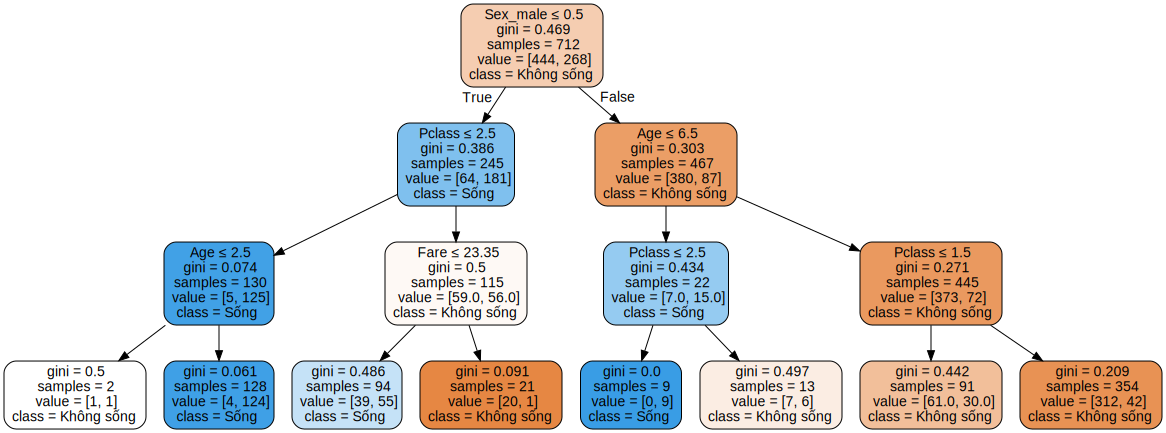

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['Không sống', 'Sống'],
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph


In [ ]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
params = {'max_depth': [1, 2, 3, 4, 5, 6, 8, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), params, cv=4, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best params:", grid_dt.best_params_)
print("Best score:", grid_dt.best_score_)


Best params: {'max_depth': 4}
Best score: 0.8103932584269664


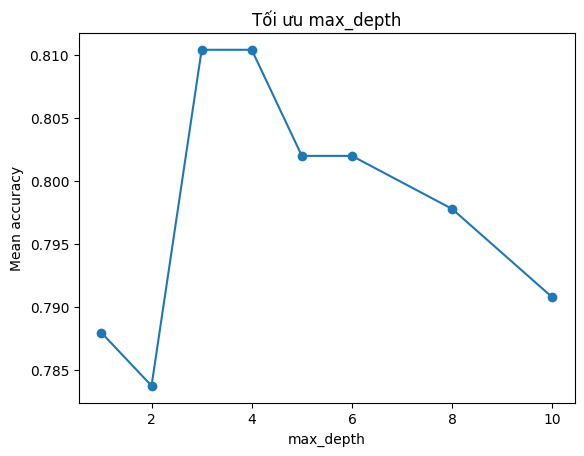

In [ ]:
result = pd.DataFrame(grid_dt.cv_results_)
plt.plot(result['param_max_depth'], result['mean_test_score'], marker='o')
plt.xlabel("max_depth")
plt.ylabel("Mean accuracy")
plt.title("Tối ưu max_depth")
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
params = {'n_estimators': list(range(10, 210, 20))}

grid_rf = GridSearchCV(
    rf, params, scoring='accuracy', cv=4, return_train_score=True
)
grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)


Best params: {'n_estimators': 50}


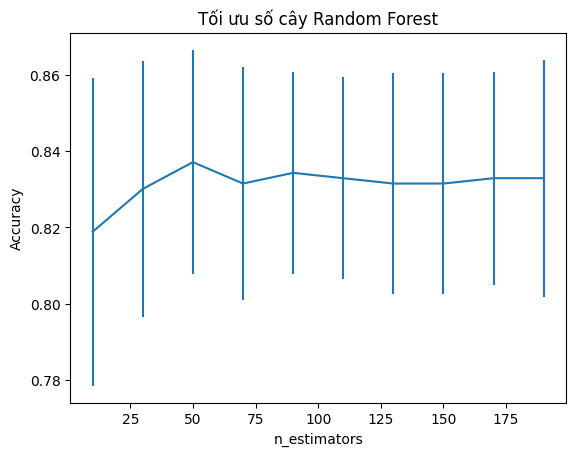

In [ ]:
df_rf = pd.DataFrame(grid_rf.cv_results_)

plt.errorbar(df_rf['param_n_estimators'], df_rf['mean_test_score'],
             yerr=df_rf['std_test_score'])
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Tối ưu số cây Random Forest")
plt.show()


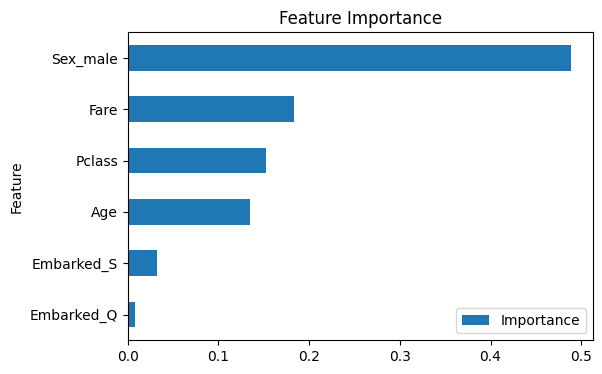

In [ ]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grid_rf.best_estimator_.feature_importances_
}).sort_values('Importance')

importances.plot(kind='barh', x='Feature', figsize=(6,4))
plt.title("Feature Importance")
plt.show()
